In [112]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing The Libraries

In [113]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import accuracy_score
import seaborn as sn
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Preprocessing


In [114]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/DATASET/OSX_DS_assignment.csv')

In [115]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


### Insights

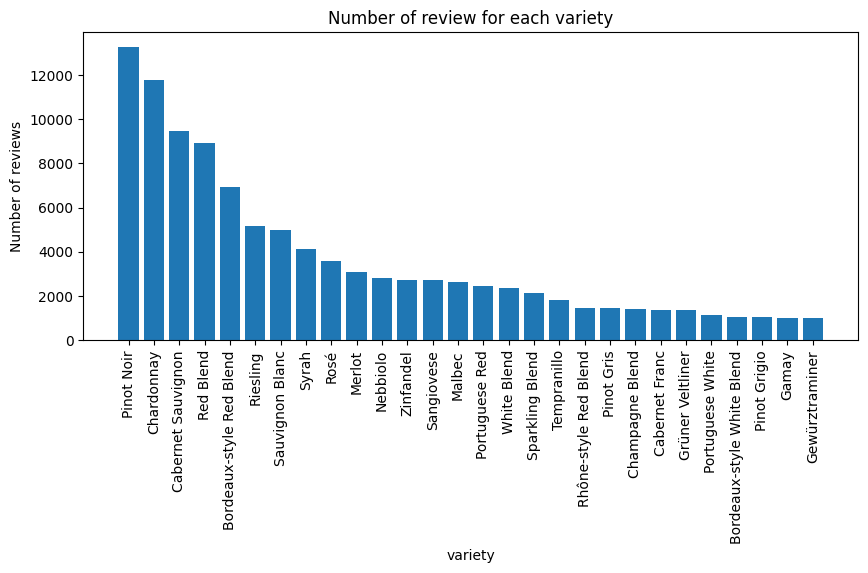

variety
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer      

In [116]:
# set parameter for ploting
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':100})

# Count the number of reviews for each variety
variety_count = df.groupby('variety')['points'].count()
# Sort the groups by count
sorted_variety_count = variety_count.sort_values(ascending=False)
# Create a bar plot
plt.bar(sorted_variety_count.index, sorted_variety_count.values)

# Add labels and title to the plot
plt.xlabel('variety')
plt.ylabel('Number of reviews')
plt.title('Number of review for each variety')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

sorted_variety_count

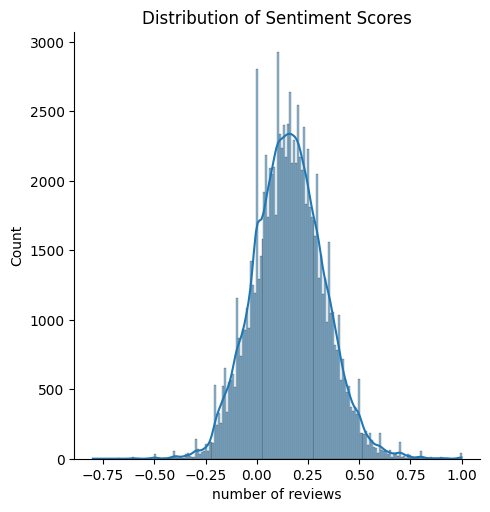

variety
Portuguese White              0.275040
Bordeaux-style White Blend    0.246775
Gewürztraminer                0.239397
Champagne Blend               0.229984
Pinot Gris                    0.213844
Rosé                          0.208306
Grüner Veltliner              0.203769
Chardonnay                    0.200851
Pinot Grigio                  0.194378
Sparkling Blend               0.185588
Riesling                      0.184677
Sauvignon Blanc               0.181425
Gamay                         0.178610
White Blend                   0.177342
Portuguese Red                0.164923
Pinot Noir                    0.161825
Zinfandel                     0.151831
Bordeaux-style Red Blend      0.144361
Syrah                         0.134874
Cabernet Franc                0.133955
Rhône-style Red Blend         0.133554
Merlot                        0.130718
Cabernet Sauvignon            0.123392
Malbec                        0.103623
Red Blend                     0.102676
Tempranillo      

In [117]:
from textblob import TextBlob
import seaborn as sns

# Sentiment analysis on review_description
df['sentiment'] = df['review_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
sns.displot(df['sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('number of reviews')
plt.show()

# Average sentiment score per variety
average_sentiment = df.groupby('variety')['sentiment'].mean().sort_values(ascending=False)
print(average_sentiment)


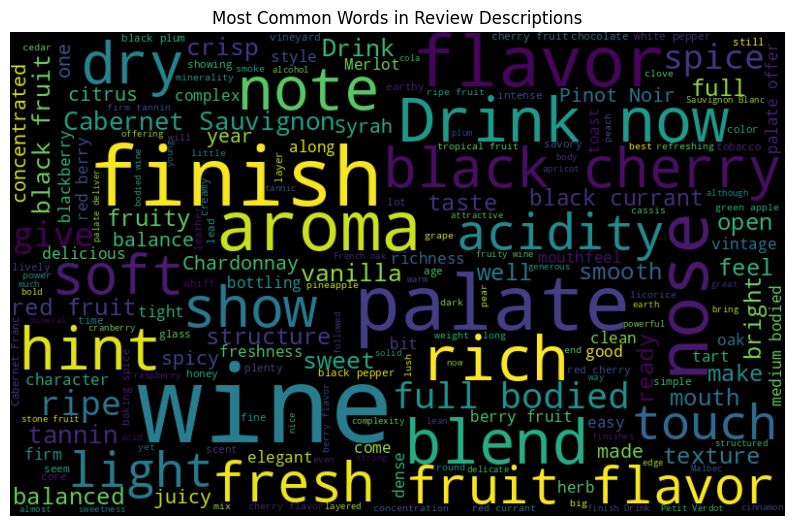

In [118]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['review_description']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Words in Review Descriptions')
plt.show()

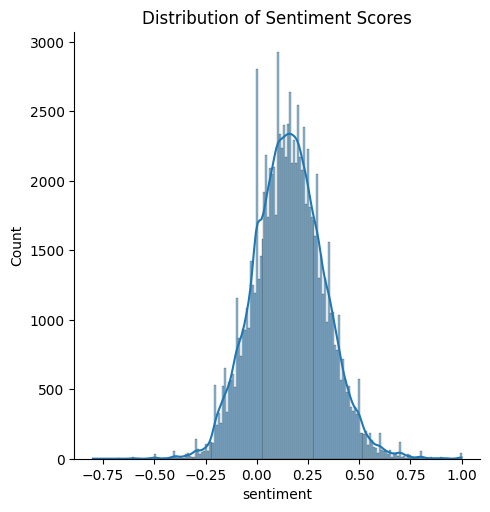

In [119]:
from textblob import TextBlob

# Sentiment analysis on review_description
df['sentiment'] = df['review_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
sns.displot(df['sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()



variety
Portuguese White              0.275040
Bordeaux-style White Blend    0.246775
Gewürztraminer                0.239397
Champagne Blend               0.229984
Pinot Gris                    0.213844
Rosé                          0.208306
Grüner Veltliner              0.203769
Chardonnay                    0.200851
Pinot Grigio                  0.194378
Sparkling Blend               0.185588
Riesling                      0.184677
Sauvignon Blanc               0.181425
Gamay                         0.178610
White Blend                   0.177342
Portuguese Red                0.164923
Pinot Noir                    0.161825
Zinfandel                     0.151831
Bordeaux-style Red Blend      0.144361
Syrah                         0.134874
Cabernet Franc                0.133955
Rhône-style Red Blend         0.133554
Merlot                        0.130718
Cabernet Sauvignon            0.123392
Malbec                        0.103623
Red Blend                     0.102676
Tempranillo      

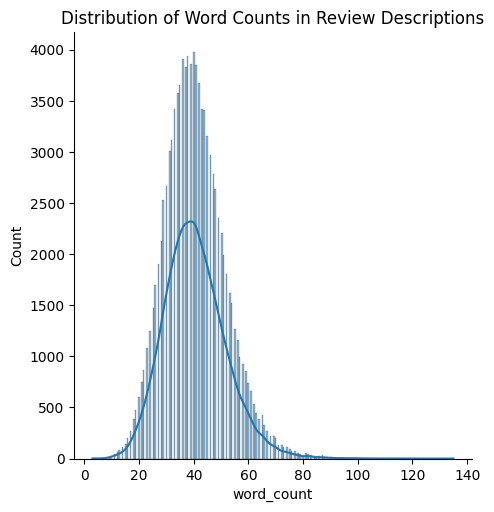

variety
Rhône-style Red Blend         44.857240
Red Blend                     42.827856
Syrah                         42.738049
Tempranillo                   42.669613
Pinot Noir                    42.486438
Champagne Blend               42.414040
Malbec                        42.229261
Nebbiolo                      42.159058
Cabernet Sauvignon            41.921242
Riesling                      41.038736
Cabernet Franc                40.875831
Bordeaux-style Red Blend      40.484165
Gewürztraminer                40.460474
Sangiovese                    40.141116
White Blend                   39.982627
Portuguese Red                39.854826
Sparkling Blend               39.635392
Pinot Gris                    39.282474
Grüner Veltliner              39.147212
Zinfandel                     38.617170
Chardonnay                    38.348507
Merlot                        38.063507
Sauvignon Blanc               37.988122
Gamay                         37.063415
Bordeaux-style White Blend    36

In [120]:
# Average sentiment score per variety
average_sentiment = df.groupby('variety')['sentiment'].mean().sort_values(ascending=False)
print(average_sentiment)

# Word count analysis on review_description
df['word_count'] = df['review_description'].apply(lambda x: len(str(x).split()))

# Visualize word count distribution
sns.displot(df['word_count'], kde=True)
plt.title('Distribution of Word Counts in Review Descriptions')
plt.show()

# Average word count per variety
average_word_count = df.groupby('variety')['word_count'].mean().sort_values(ascending=False)
print(average_word_count)

         user_name country                                       review_title  \
count        79191  103283                                             103322   
unique          15      40                                              94482   
top     @vossroger      US  Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...   
freq         21971   48153                                                 11   
mean           NaN     NaN                                                NaN   
std            NaN     NaN                                                NaN   
min            NaN     NaN                                                NaN   
25%            NaN     NaN                                                NaN   
50%            NaN     NaN                                                NaN   
75%            NaN     NaN                                                NaN   
max            NaN     NaN                                                NaN   

                           

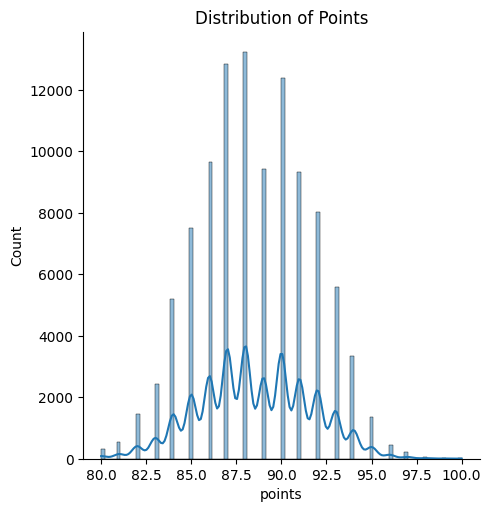

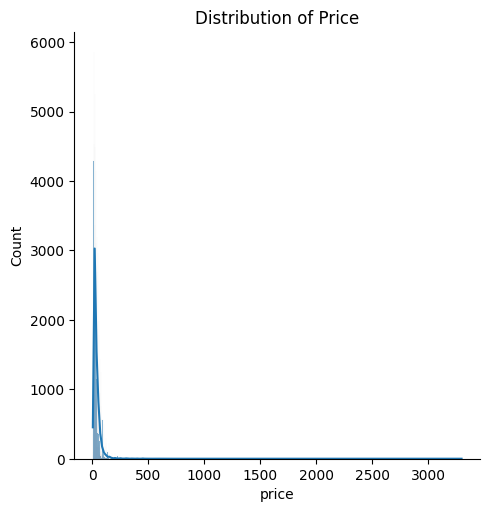

In [121]:
# Summary of the dataset
print(df.describe(include='all'))

# Check the distribution of points
sns.displot(df['points'], kde=True)
plt.title('Distribution of Points')
plt.show()

# Check the distribution of price
sns.displot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()



US                48153
France            19932
Italy             11370
Portugal           4038
Chile              3630
Spain              3438
Argentina          3204
Austria            2413
Germany            1944
New Zealand        1398
Australia          1291
South Africa        906
Israel              398
Canada              212
Greece              192
Bulgaria            118
Romania             100
England              74
Slovenia             58
Mexico               54
Hungary              50
Moldova              43
Uruguay              40
Turkey               38
Brazil               37
Lebanon              33
Morocco              23
Georgia              17
Croatia              16
Ukraine              12
Peru                 12
Cyprus                8
Serbia                6
Macedonia             6
Luxembourg            5
Czech Republic        5
Switzerland           5
India                 2
Slovakia              1
Armenia               1
Name: country, dtype: int64


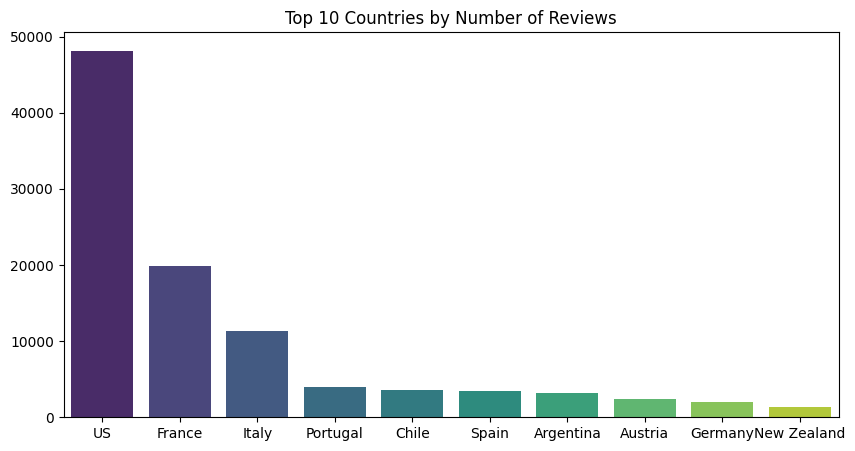

In [122]:
# Check the number of reviews per country
country_counts = df['country'].value_counts()
print(country_counts)

# Visualize the top 10 countries
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts[:10].index, y=country_counts[:10].values, palette='viridis')
plt.title('Top 10 Countries by Number of Reviews')
plt.show()



Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

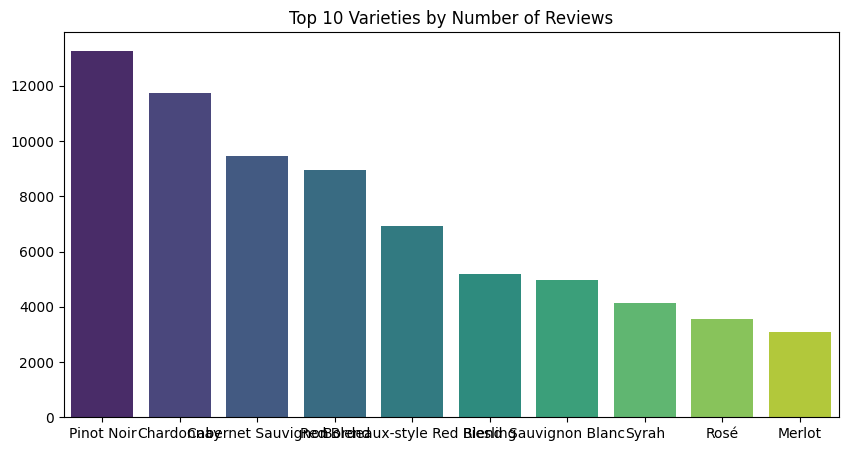

<ipython-input-123-8502cab869ec>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


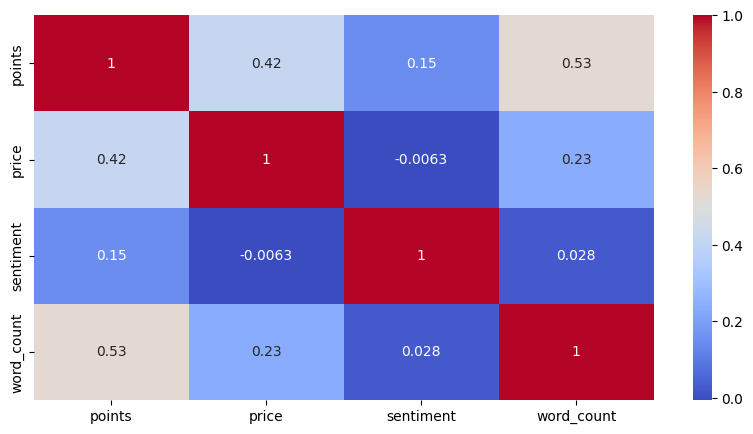

In [123]:
# Check the number of reviews per variety
variety_counts = df['variety'].value_counts()
print(variety_counts)

# Visualize the top 10 varieties
plt.figure(figsize=(10,5))
sns.barplot(x=variety_counts[:10].index, y=variety_counts[:10].values, palette='viridis')
plt.title('Top 10 Varieties by Number of Reviews')
plt.show()

# Check correlation between numeric variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Remove NaN Values Or Repalce

In [124]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/OSX_DS_assignment.csv')
# drop of replace to remove na values
df.drop('region_2', axis=1, inplace=True)
df.drop('user_name', axis=1, inplace=True)
df.dropna(subset=['country'], inplace=True)
df['price'] = df['price'].fillna(df['price'].mean())
df['region_1'] = df['region_1'].fillna('unknown')
df['designation'] = df['designation'].fillna('unknown')

# normalize price and points field
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

df['price'] = normalize(df['price'])
df['points'] = normalize(df['points'])




In [125]:
df.isna().sum()

country               0
review_title          0
review_description    0
designation           0
points                0
price                 0
province              0
region_1              0
winery                0
variety               0
dtype: int64

In [126]:
# applying label encoder on target variable
Label_Encoder = LabelEncoder()
df['variety'] = Label_Encoder.fit_transform(df['variety'])
encodings = pd.DataFrame( {'label' : Label_Encoder.inverse_transform([i for i in range(1, 28)]), 'number':[i for i in range(1, 28)] } )

#### Checking Datatypes

In [127]:
df.dtypes

country                object
review_title           object
review_description     object
designation            object
points                float64
price                 float64
province               object
region_1               object
winery                 object
variety                 int64
dtype: object

In [128]:
X, Y = df.drop(['variety'], axis=1), df['variety']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(82626, 9) (20657, 9)


In [129]:
#Convert Categotical Featrues Into Numerical
# training data
onehot_encoder = OneHotEncoder(max_categories=5000, handle_unknown='ignore')
onehot_encoded_designation = onehot_encoder.fit_transform(X_train['designation'].values.reshape(-1, 1))
# decided number of components to represent each feature
n_components = 3
pca = PCA(n_components=n_components)
pca_result_train = pca.fit_transform(onehot_encoded_designation.toarray())
# testing data
onehot_encoded_designation = onehot_encoder.transform(X_test['designation'].values.reshape(-1, 1))
pca_result_test = pca.transform(onehot_encoded_designation.toarray())


In [130]:
# designation train
pca_df = pd.DataFrame(data=pca_result_train, columns=['designation' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['designation'], inplace=True, axis = 1)
print(pca_df.shape)
# designation test
pca_df = pd.DataFrame(data=pca_result_test, columns=['designation' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['designation'], inplace=True, axis = 1)

(82626, 3)


In [131]:
onehot_encoded_province = onehot_encoder.fit_transform(X_train['province'].values.reshape(-1, 1))
pca_result_train = pca.fit_transform(onehot_encoded_province.toarray())
onehot_encoded_province = onehot_encoder.transform(X_test['province'].values.reshape(-1, 1))
pca_result_test = pca.transform(onehot_encoded_province.toarray())

# province train
pca_df = pd.DataFrame(data=pca_result_train, columns=['province' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['province'], inplace=True, axis = 1)
# province test
pca_df = pd.DataFrame(data=pca_result_test, columns=['province' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['province'], inplace=True, axis = 1)

In [132]:
onehot_encoded_region_1 = onehot_encoder.fit_transform(X_train['region_1'].values.reshape(-1, 1))
pca_result_train = pca.fit_transform(onehot_encoded_region_1.toarray())
onehot_encoded_region_1 = onehot_encoder.transform(X_test['region_1'].values.reshape(-1, 1))
pca_result_test = pca.transform(onehot_encoded_region_1.toarray())
# region_1 train
pca_df = pd.DataFrame(data=pca_result_train, columns=['region_1_' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['region_1'], inplace=True, axis = 1)
# region_1 test
pca_df = pd.DataFrame(data=pca_result_test, columns=['region_1_' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['region_1'], inplace=True, axis = 1)


In [133]:
onehot_encoded_winery = onehot_encoder.fit_transform(X_train['winery'].values.reshape(-1, 1))
pca_result_train = pca.fit_transform(onehot_encoded_winery.toarray())
onehot_encoded_winery = onehot_encoder.transform(X_test['winery'].values.reshape(-1, 1))
pca_result_test = pca.transform(onehot_encoded_winery.toarray())

pca_df = pd.DataFrame(data=pca_result_train, columns=['winery' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['winery'], inplace=True, axis = 1)
# winery test
pca_df = pd.DataFrame(data=pca_result_test, columns=['winery' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['winery'], inplace=True, axis = 1)

In [134]:
onehot_encoded_country = onehot_encoder.fit_transform(X_train['country'].values.reshape(-1, 1))
pca_result_train = pca.fit_transform(onehot_encoded_country.toarray())
onehot_encoded_country = onehot_encoder.transform(X_test['country'].values.reshape(-1, 1))
pca_result_test = pca.transform(onehot_encoded_country.toarray())
# country train
pca_df = pd.DataFrame(data=pca_result_train, columns=['country' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['country'], inplace=True, axis = 1)
# country test
pca_df = pd.DataFrame(data=pca_result_test, columns=['country' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['country'], inplace=True, axis = 1)


## Preprocess The Reviews

In [135]:
# train data
X_train['review_title_review_description'] = X_train['review_title'] + " " + X_train['review_description']
X_train.drop(['review_title'], inplace=True, axis = 1)
X_train.drop(['review_description'], inplace=True, axis = 1)

# convert to lowercase
X_train['review_title_review_description'] = X_train['review_title_review_description'].str.lower()

# Remove punctuation
X_train['review_title_review_description'] = X_train['review_title_review_description'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Remove stopwords
stop_words = set(stopwords.words('english'))
X_train['review_title_review_description'] = X_train['review_title_review_description'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Lemmatization
lemmatizer = WordNetLemmatizer()
X_train['review_title_review_description'] = X_train['review_title_review_description'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))


In [136]:
# train data
X_test['review_title_review_description'] = X_test['review_title'] + " " + X_test['review_description']
X_test.drop(['review_title'], inplace=True, axis = 1)
X_test.drop(['review_description'], inplace=True, axis = 1)

# convert to lowercase
X_test['review_title_review_description'] = X_test['review_title_review_description'].str.lower()

# Remove punctuation
X_test['review_title_review_description'] = X_test['review_title_review_description'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Remove stopwords
stop_words = set(stopwords.words('english'))
X_test['review_title_review_description'] = X_test['review_title_review_description'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Lemmatization
lemmatizer = WordNetLemmatizer()
X_test['review_title_review_description'] = X_test['review_title_review_description'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))


In [137]:
# create TFIDF Vectors
tf_idf_title_desc_vectorizer= TfidfVectorizer(max_features=500)
# applying tf idf to training data
X_train_tf_idf = tf_idf_title_desc_vectorizer.fit_transform(X_train['review_title_review_description'])
tf_idf_train_df = pd.DataFrame(data=X_train_tf_idf.toarray())
X_train = pd.concat([X_train, tf_idf_train_df], axis=1)

# applying tf idf to test data
X_test_tf_idf = tf_idf_title_desc_vectorizer.transform(X_test['review_title_review_description'])
tf_idf_test_df = pd.DataFrame(data=X_test_tf_idf.toarray())
X_test = pd.concat([X_test, tf_idf_test_df], axis=1)

X_train.drop(['review_title_review_description'], inplace=True, axis = 1)
X_test.drop(['review_title_review_description'], inplace=True, axis = 1)


In [138]:
X_train

,points,price,designation1,designation2,designation3,province1,province2,province3,region_1_1,region_1_2,...,490,491,492,493,494,495,496,497,498,499
0,0.40,0.005461,0.718118,-0.306445,0.002359,0.702816,0.015585,0.009517,-0.158067,-0.041337,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
1,0.55,0.009709,0.718118,-0.306445,0.002359,0.702816,0.015585,0.009517,-0.150220,-0.033270,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
2,0.50,0.012439,0.718118,-0.306445,0.002359,0.702816,0.015585,0.009517,-0.152145,-0.034948,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
3,0.25,0.001820,-0.695353,-0.260620,0.002130,-0.272698,-0.054838,-0.044542,0.850922,0.009173,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
4,0.55,0.006068,0.034200,0.419921,-0.040023,-0.285855,-0.064500,-0.054880,-0.144077,-0.028488,...,0.0,0.0,0.0,0.000000,0.201006,0.0,0.0,0.21094,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82621,0.50,0.018507,0.034202,0.419963,-0.040054,-0.273319,-0.055246,-0.044960,-0.141617,-0.026851,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
82622,0.35,0.008495,0.034802,0.438795,-0.059387,0.702816,0.015585,0.009517,-0.142638,-0.027514,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
82623,0.60,0.018507,0.034200,0.419921,-0.040023,-0.347140,-0.181657,-0.363737,-0.146986,-0.030616,...,0.0,0.0,0.0,0.182478,0.000000,0.0,0.0,0.00000,0.0,0.0
82624,0.50,0.005461,0.718118,-0.306445,0.002359,-0.310423,-0.090736,-0.088608,-0.142296,-0.027289,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.26119,0.0,0.0


### Normalization of Data That is not Normalized on Scale -1 to 1


In [139]:
from sklearn.preprocessing import MinMaxScaler
# scale price and points field in range [0,1]
price_scaler = MinMaxScaler()
X_train['price'] = price_scaler.fit_transform(X_train['price'].to_numpy().reshape(-1, 1))
X_test['price'] = price_scaler.transform(X_test['price'].to_numpy().reshape(-1, 1))

points_scaler = MinMaxScaler()
X_train['points'] = points_scaler.fit_transform(X_train['price'].to_numpy().reshape(-1, 1))
X_test['points'] = points_scaler.transform(X_test['price'].to_numpy().reshape(-1, 1))


In [140]:
# convert columns name to string
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

### Build Models

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
decesiontree = DecisionTreeClassifier(random_state=0)
decesiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [142]:
y_pred = decesiontree.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print("Accuracy of Desision Tree model is: ",ac)
print(classification_report(y_test, y_pred))

Accuracy of Desision Tree model is:  0.9423924093527618
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1352
           1       0.84      0.85      0.85       213
           2       0.94      0.94      0.94       276
           3       0.97      0.97      0.97      1941
           4       0.91      0.89      0.90       263
           5       0.98      0.97      0.98      2334
           6       0.98      0.96      0.97       219
           7       0.86      0.91      0.88       184
           8       0.99      1.00      1.00       251
           9       0.99      0.99      0.99       526
          10       0.94      0.93      0.94       628
          11       0.98      0.96      0.97       541
          12       1.00      0.96      0.98       217
          13       0.96      0.99      0.97       279
          14       0.98      0.99      0.98      2673
          15       0.98      0.99      0.99       535
          16       0.98  

## API

In [143]:
def predict_wine_variety(designation, province, region_1, winery, country, review_title, review_description, points, price):
    # Initialize an empty array to store features
    all_features = np.array([])

    # Encode the categorical features
    for feature in [designation, province, region_1, winery, country]:
        encoded_feature = onehot_encoder.transform(np.array(feature).reshape(-1,1)).toarray()
        pca_feature = pca.transform(encoded_feature)
        all_features = np.append(all_features, pca_feature)

    # Preprocess the review title and description
    title_desc = (review_title + " " + review_description).lower()
    title_desc = re.sub(r'[^\w\s]', '', title_desc)
    title_desc = ' '.join(word for word in title_desc.split() if word not in stop_words)
    title_desc = ' '.join(lemmatizer.lemmatize(word) for word in title_desc.split())
    title_desc_tf_idfs = tf_idf_title_desc_vectorizer.transform([title_desc]).toarray()
    all_features = np.append(all_features, title_desc_tf_idfs)

    # Scale the numerical features
    points = points_scaler.transform(np.array(points).reshape(-1,1))
    price = price_scaler.transform(np.array(price).reshape(-1,1))
    all_features = np.append(all_features, [points, price])

    # Predict the wine variety using the trained Random Forest Classifier
    predicted_variety = decesiontree.predict(all_features.reshape(1,-1))

    # Return the predicted variety in the original string format
    return Label_Encoder.inverse_transform(predicted_variety)[0]


In [144]:
## Testing 
predict_wine_variety('Mountain CuvÃ©e', 'California', 'Napa Valley','Kirkland Signature','US', 'Kirkland Signature 2011 Mountain CuvÃ©e Cabernet Sauvignon (Napa Valley)', 'Soft, supple plum envelopes an oaky structure in this Cabernet, supported by 15% Merlot. Coffee and chocolate complete the picture, finishing strong at the end, resulting in a value-priced wine of attractive flavor and immediate accessibility.', 87,19)

'Zinfandel'